In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Import data
train_df = pd.read_csv("../data/train.csv", sep=",")
test_df = pd.read_csv("../data/test.csv", sep=",")
train_df["test"] = 0
test_df["test"] = 1
test_df["price_doc"] = 0
full_df = pd.concat([train_df, test_df], axis=0)
full_df = full_df.set_index(full_df["id"])
print(full_df.shape)

(38133, 293)


In [41]:
for col in full_df.columns:
    print(col, full_df[col].dtypes)

0_13_all int64
0_13_female int64
0_13_male int64
0_17_all int64
0_17_female int64
0_17_male int64
0_6_all int64
0_6_female int64
0_6_male int64
16_29_all int64
16_29_female int64
16_29_male int64
7_14_all int64
7_14_female int64
7_14_male int64
ID_big_road1 int64
ID_big_road2 int64
ID_bus_terminal int64
ID_metro int64
ID_railroad_station_avto int64
ID_railroad_station_walk float64
ID_railroad_terminal int64
additional_education_km float64
additional_education_raion int64
area_m float64
basketball_km float64
big_church_count_1000 int64
big_church_count_1500 int64
big_church_count_2000 int64
big_church_count_3000 int64
big_church_count_500 int64
big_church_count_5000 int64
big_church_km float64
big_market_km float64
big_market_raion object
big_road1_1line object
big_road1_km float64
big_road2_km float64
build_count_1921-1945 float64
build_count_1946-1970 float64
build_count_1971-1995 float64
build_count_after_1995 float64
build_count_before_1920 float64
build_count_block float64
build_co

<h1> Cleaning </h1>

<h3> Binarize some columns from dataset </h3>

In [42]:
to_binarize = ["water_1line", "big_market_raion", "big_road1_1line", "culture_objects_top_25",
               "detention_facility_raion", "incineration_raion", "detention_facility_raion", "nuclear_reactor_raion",
               "oil_chemistry_raion", "radiation_raion", "railroad_1line", "thermal_power_plant_raion"]
for col in to_binarize:
    full_df[col] = full_df[col].apply(lambda el: 1 if el == "yes" else 0)

In [43]:
for col in full_df.columns:
    print(col, full_df[col].isnull().sum())

0_13_all 0
0_13_female 0
0_13_male 0
0_17_all 0
0_17_female 0
0_17_male 0
0_6_all 0
0_6_female 0
0_6_male 0
16_29_all 0
16_29_female 0
16_29_male 0
7_14_all 0
7_14_female 0
7_14_male 0
ID_big_road1 0
ID_big_road2 0
ID_bus_terminal 0
ID_metro 0
ID_railroad_station_avto 0
ID_railroad_station_walk 59
ID_railroad_terminal 0
additional_education_km 0
additional_education_raion 0
area_m 0
basketball_km 0
big_church_count_1000 0
big_church_count_1500 0
big_church_count_2000 0
big_church_count_3000 0
big_church_count_500 0
big_church_count_5000 0
big_church_km 0
big_market_km 0
big_market_raion 0
big_road1_1line 0
big_road1_km 0
big_road2_km 0
build_count_1921-1945 6209
build_count_1946-1970 6209
build_count_1971-1995 6209
build_count_after_1995 6209
build_count_before_1920 6209
build_count_block 6209
build_count_brick 6209
build_count_foam 6209
build_count_frame 6209
build_count_mix 6209
build_count_monolith 6209
build_count_panel 6209
build_count_slag 6209
build_count_wood 6209
build_year 14

<h3> Life Sq and Full Sq </h3>

dimensions before drop : (38133, 293)
dimensions after drop : (30574, 2)


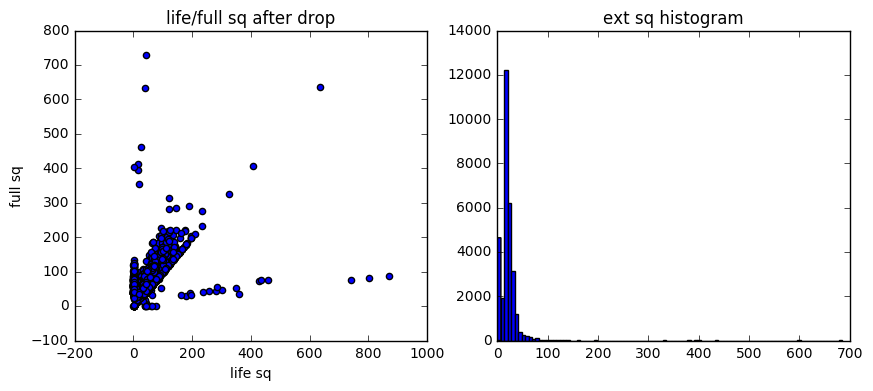

In [50]:
# Drop NA : 
print("dimensions before drop : %s" % str(full_df.shape))
sq_df = full_df[["full_sq", "life_sq"]].dropna()
print("dimensions after drop : %s" % str(sq_df.shape))

# remove life_sq and full_sq exceptions.
sq_df = sq_df.drop(labels=[3530, 13549], axis=0)
fig = plt.figure(figsize=[10, 4])
ax1 = fig.add_subplot(121)
ax1.scatter(sq_df["life_sq"], sq_df["full_sq"])
ax1.set_xlabel("life sq")
ax1.set_ylabel("full sq")
ax1.set_title("life/full sq after drop")


# Studying ext_sq = full_sq - life_sq : 
sq_df["ext_sq"] = sq_df["full_sq"] - sq_df["life_sq"]
ax2 = fig.add_subplot(122)
ax2.hist(sq_df[sq_df["ext_sq"] >= 0.0]["ext_sq"], bins=100)
ax2.set_title("ext sq histogram")
plt.show()

In [13]:
full_df[["build_count_before_1920", "build_count_1921-1945", "build_count_1946-1970", "build_count_1946-1970", "build_count_1971-1995",
        "build_count_after_1995"]]

,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1946-1970,build_count_1971-1995,build_count_after_1995
0,0.0,0.0,0.0,0.0,206.0,5.0
1,1.0,1.0,143.0,143.0,84.0,15.0
2,1.0,0.0,246.0,246.0,63.0,20.0
3,13.0,24.0,40.0,40.0,130.0,252.0
4,371.0,114.0,146.0,146.0,62.0,53.0
5,0.0,5.0,152.0,152.0,25.0,6.0
6,11.0,38.0,90.0,90.0,58.0,19.0
7,0.0,0.0,0.0,0.0,206.0,5.0
8,1.0,9.0,290.0,290.0,39.0,51.0
9,47.0,88.0,413.0,413.0,94.0,96.0
